# Feedback
## Exercise 1
1. 
    1. automatically detected the necessary number of rows  1/1
    2. correctly transposed images 1/1
    3. axis labels removed 0.5/0.5
    4. images entitled 0.5/0.5

2. reasonable labels for classes are missing 0.5/1

## Exercise 2
1. 
    1. stopping criterion not correctly implemented 0.5/1
    2. performance curves nice 0.5/0.5
2. 
    1. correct record of the history 1/1
    2. overview figure is nice. 0.5/0.5
3. 
    1. best configuration correctly determined but not trained correctly 0.25/0.5
    2. predictions not shown correctly 0/0.5
    
Total: 1 + 1 + 0.5 + 0.5 + 0.5 + 0.5 + 0.5 + 1 + 0.5 + 0.25 + 0 = 6.25/8

# Universidad de La Sabana 

**Felix Mohr**

## Facultad de Ingenería 2022.2
Supervised Machine Learning


- Gerson Barrera
- Santiago Merchán
- Rodrigo Carranza

Libraries

In [2]:
!pip install sklearn

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import time

In [4]:
import numpy as np
import pandas as pd
import scipy.linalg
import scipy.stats
from scipy.stats import norm as normal
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.discriminant_analysis
from sklearn.model_selection import train_test_split
import sklearn.tree
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import sklearn.datasets as dfs
import sklearn.metrics
from numpy import percentile
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pprint import pprint
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from numpy import linspace
import random
%matplotlib inline
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform 
from sklearn.preprocessing import Normalizer
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn

In [5]:
#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import brier_score_loss

#Model Selection
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

import warnings
warnings.filterwarnings("ignore")

import sklearn.tree
import pandas as pd
import sklearn.datasets
import random
from random import seed
from random import randint
import numpy as np
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.neural_network
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

#**Exercise 1 (4 Points)**


1. Write a function show_rgb_instances(X, y) that takes a set of n instances and creates
a k × 8 plot grid where k is the necessary number of rows to list all the instances of X
(when each row shows 8 instances). Given that there are 3 attributes per pixel (R,G,
and B for pixel 1, then R,G, and B for pixel 2, etc., in this order), and that the pictures
are quadratic, infer automatically the width (and hence height) w of the images. Then
use numpy.reshape to derive a 4D tensor (n × w × w × 3) from X (you might want to
check numpy.transpose as well to orientate the axes properly). Then use plt.imshow to
visualize those instances as images (check documentation to see how to plot rgb images).
Make sure that there are no axis labels (use ax.set_xticklabels etc.).
Use the labels in y as titles for the images.
2. Download the dataset from rgbdata.zip from teams.
Plot 8 instances per class.
Come up with label names for the classes.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
rgb=pd.read_csv('/Users/dmerchan/Downloads/rgbdata.csv')
label_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
X=rgb.drop("label",axis=1).values
y=rgb["label"].values
X = X.reshape(len(X),3,32,32)
X_train = X.transpose(0,2,3,1)


In [47]:
i=1
class_=1
y1=y[y==class_]
label_names[i]
label_names[int(y1[i])]
#y1[1]

'automobile'

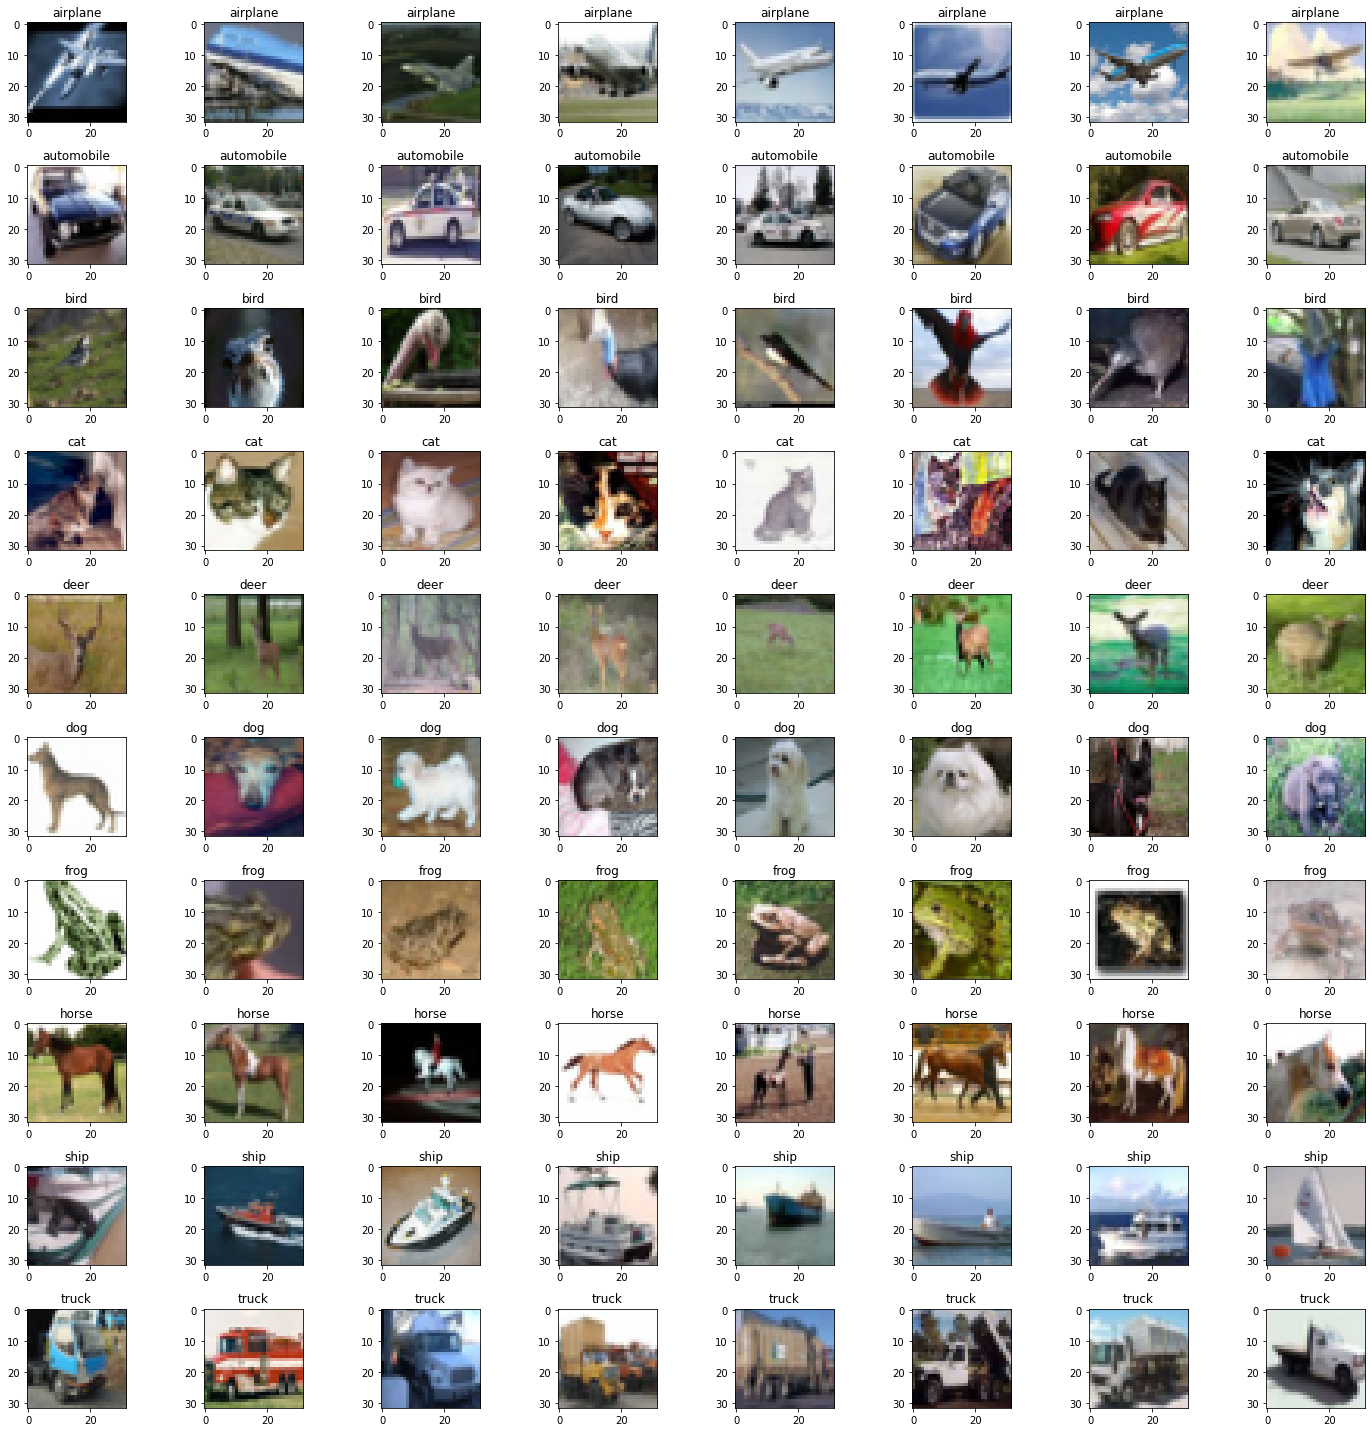

In [51]:
def show_rgb_instances(X, y):
    fig,ax=plt.subplots(10,8,figsize=(20,20))
    k=0
    for class_ in np.unique(y):
        X1=X[y==class_]
        y1=y[y==class_]
        for j in range(8):
            i=random.randint(0, len(X1))
            ax[k,j].imshow(X1[i].reshape(3,32,32).transpose(1,2,0))
            ax[k,j].set_title(label_names[int(y1[i])])
        #j=j+1
        k=k+1
#j=0
    fig.tight_layout()
    plt.show()
show_rgb_instances(X, y)

In [49]:
def show_rgb_instances(X, y):
    fig,ax=plt.subplots(10,8,figsize=(20,20))
    k=0
    for class_ in np.unique(y):
        X1=X[y==class_]
        y1=y[y==class_]
        for j in range(8):
            i=random.randint(0, len(X1))
            ax[k,j].imshow(X1[i].reshape(3,32,32).transpose(1,2,0))
            ax[k,j].set_title(label_names[y1[i]])
        #j=j+1
        k=k+1
#j=0
    fig.tight_layout()
    plt.show()

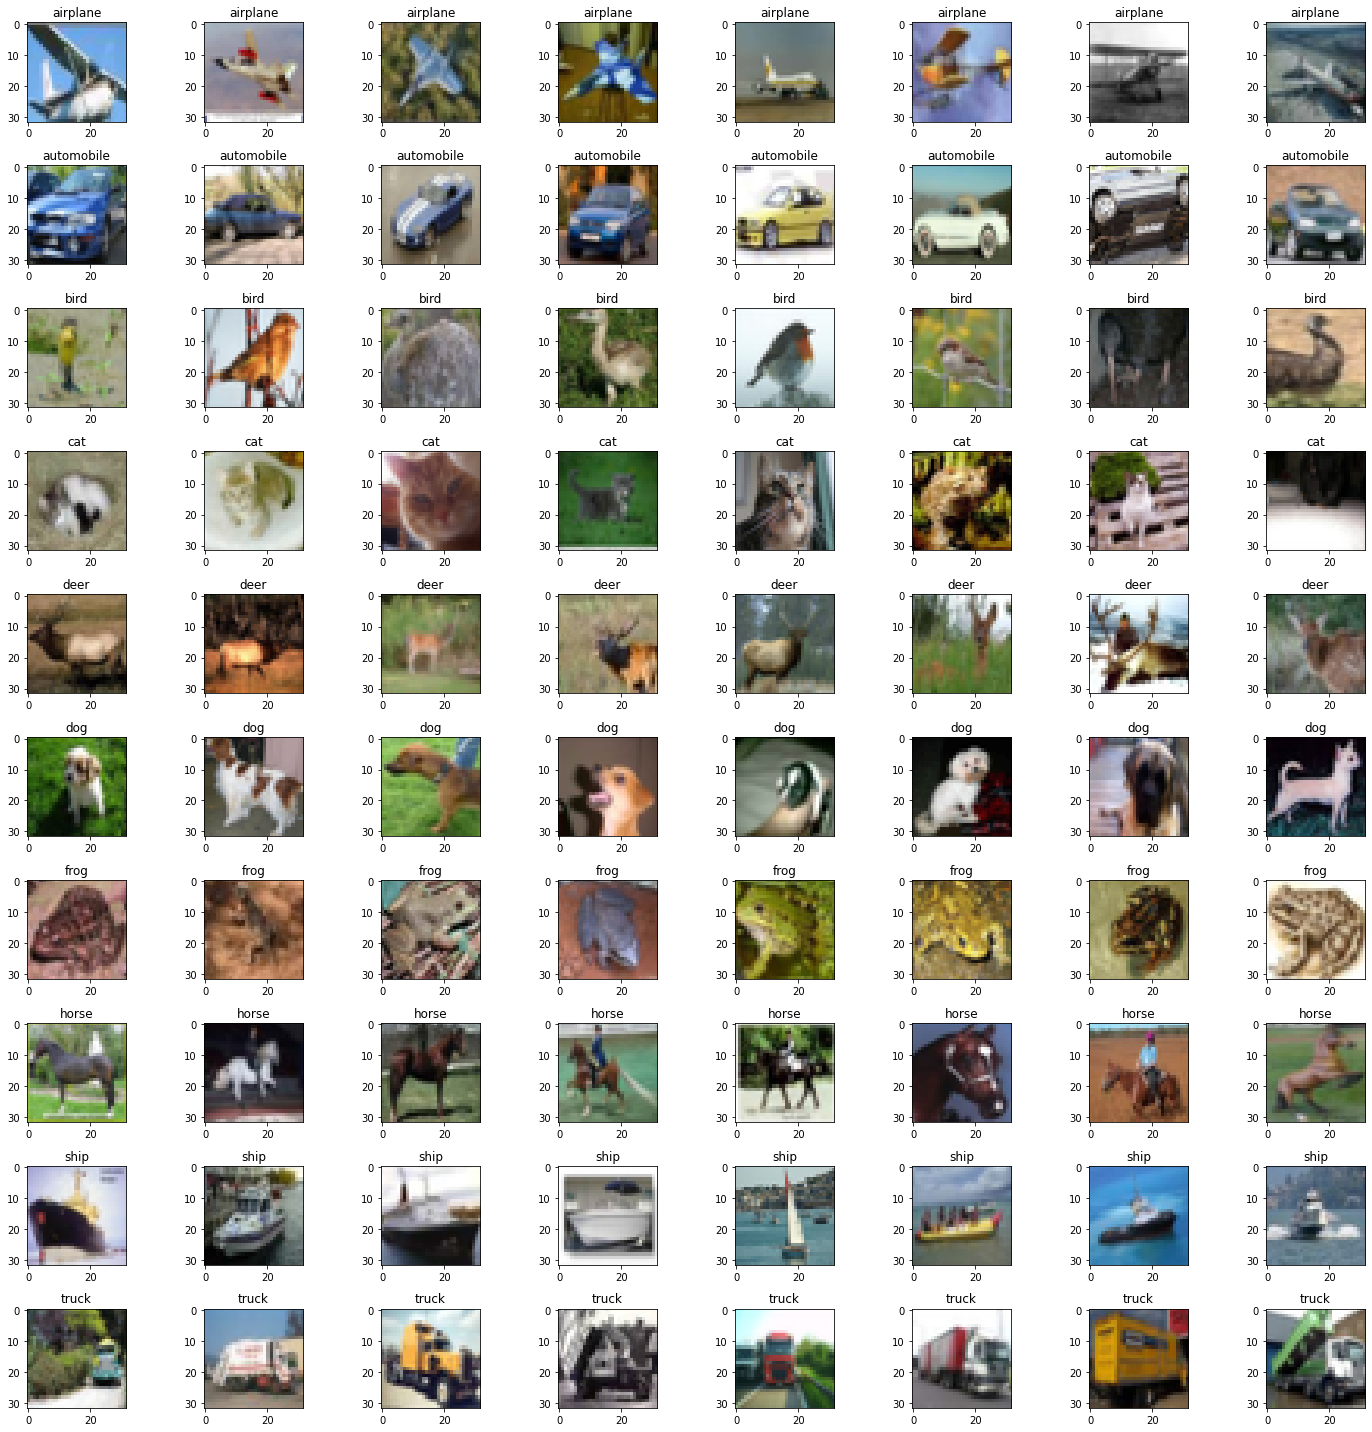

In [52]:
def show_rgb_instances(X, y,inst):
    fig,ax=plt.subplots(10,inst,figsize=(20,20))
    k=0
    for class_ in np.unique(y):
        X1=X[y==class_]
        y1=y[y==class_]
        for j in range(inst):
            i=random.randint(0, len(X1))
            ax[k,j].imshow(X1[i].reshape(3,32,32).transpose(1,2,0))
            ax[k,j].set_title(label_names[int(y1[i])])
        #j=j+1
        k=k+1
#j=0
    fig.tight_layout()
    plt.show()
show_rgb_instances(X, y,8)

Data Ingestion

In [11]:
df_raw = rgb.copy()
df_raw

pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0           74       74       75       76       75       74       75       75   
1          231      234      239      243      246      248      250      251   
2          205      203      202      200      198      197      196      195   
3           62       61       63       62       61       62       62       56   
4          155      157      159      160      159      161      167      169   
...        ...      ...      ...      ...      ...      ...      ...      ...   
24995      255      255      255      255      255      221      132      141   
24996      255      255      255      255      255      255      255      255   
24997      123      139      134      111      100      159      221      248   
24998      227      223      241      236      241      236      227      238   
24999      254      244      238      238      239      239      240      240   

       pixel_8  pixel_9  ...  pixel_3063  pixel_3064  pixel_3065  pixel_3066  \
0           75       75  ...         195         194         194         194   
1          251      250  ...          77          75          72          68   
2          194      193  ...         189         191         193         195   
3           65       66  ...         160          75          59          69   
4          171      177  ...         225         224         224         226   
...        ...      ...  ...         ...         ...         ...         ...   
24995      206      246  ...         108         111         110         112   
24996      255      255  ...         210         240         250         246   
24997      250      253  ...         222         218         223         226   
24998      243      223  ...          55          53          37          63   
24999      237      238  ...         186         187         189         188   

       pixel_3067  pixel_3068  pixel_3069  pixel_3070  pixel_3071  label  
0             193         192         191         188         188      0  
1              64          59          59          57          53      0  
2             197         198         200         201         203      0  
3              83          70          95         169         178      0  
4             214         194         190         196         197      0  
...           ...         ...         ...         ...         ...    ...  
24995         115         118         120         124         122      9  
24996         243         246         247         246         240      9  
24997         226         225         226         227         224      9  
24998         118         176         222         246         255      9  
24999         188         188         190         192         174      9  

[25000 rows x 3073 columns]

In [12]:
print('Size of the dataframe: {}'.format(df_raw.shape))

Size of the dataframe: (25000, 3073)


In [13]:
X=df_raw.drop("label",axis=1).values
y=df_raw["label"].values
label_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
X = X.reshape(len(X),3,32,32)
X_train = X.transpose(0,2,3,1)

In [14]:
image = X[0]
image = image.reshape(3,32,32)
print(image.shape)

(3, 32, 32)


In [15]:
#show_rgb_instances(X, y)

#**Exercise 2(4 points)**
Randomly partition the data to stick with 20000 training instances and 5000 validation instances.

In this exercise, never user any of the last 5000 instances during the training process of a network. Use the scikit-learnMLPClassifier to train 6 different networks with one hidden layer and between 1 and 200 units in this layer:n1∈{1,2,4,10,100,200}. Try learning rates{1,10−1, ..,10−6} and all the available activation functions. This should give in total 6×6×4 = 144 networks.

1. For each of these configurations, train the network until the best score observed is not improved in 20 epochs. Then extract and visualize the curve that shows the performance as a function of iterations (this is available via the scikit-learn API of theMLPClassifier).
2. Also record

a) the total number of iterations required for each configuration for convergence.

b) the training time

c) the final test performance

Then find a way of compactly visualizing these performances for comparison across the 144 configurations (maybe use sns.heatmap or plt.imshow).
Which is the best accuracy you can achieve on the validation fold? For which configuration (architecture + activations + learning rate) did you observe this score?
3. Which configuration achieves best performance? Use the function show_rgb_instances to plot the predictions with the respective function for at least 100 instances in the validation fold.

In [16]:
def plot_heatmap(df_matriz):
  fig, ax = plt.subplots(figsize=(15,20))  
  sns.heatmap(df_matriz, annot=True, linewidths=.7, ax=ax)
  ax.set_title('Heatmap Plot')

  plt.show()

In [17]:
df_raw.drop(df_raw.tail(5000).index,
        inplace = True)

In [18]:
rgb_X = df_raw.drop(columns = "label")
rgb_y = df_raw['label']

1.1

In [19]:
n1 = [1,2,4,10,100,200]
lr = [1,0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001] 
af = ["identity", "logistic", "tanh", "relu"]

In [20]:
#n1 = [10,100]
#lr = [0.001, 0.0001] 
#af = ["identity", "tanh"]

In [21]:
X_analysis, X_valid, y_analysis, y_valid = sklearn.model_selection.train_test_split(rgb_X, rgb_y, test_size=5000) #, random_state= 42)
X_analysis.shape

(15000, 3072)

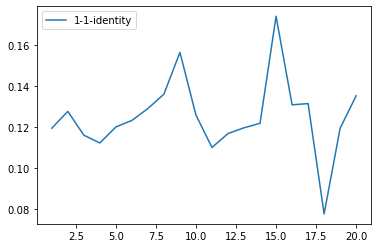

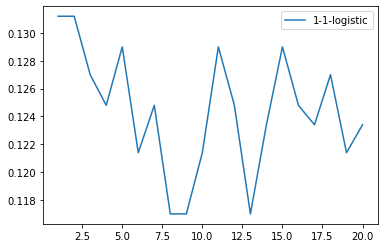

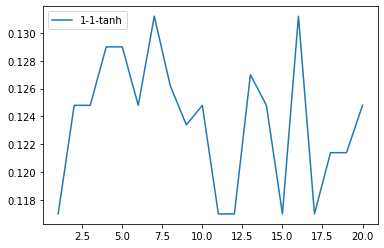

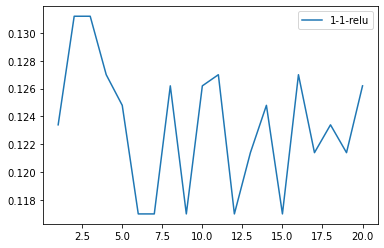

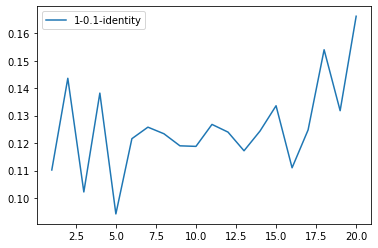

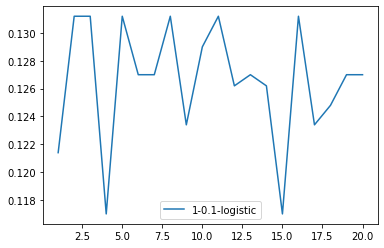

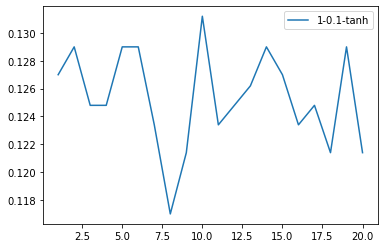

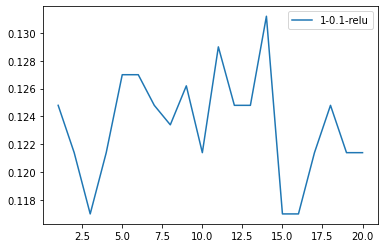

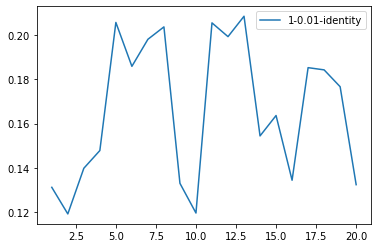

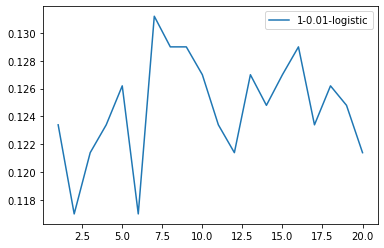

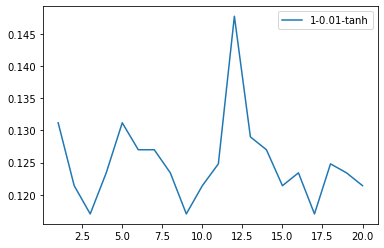

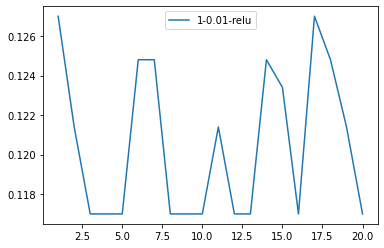

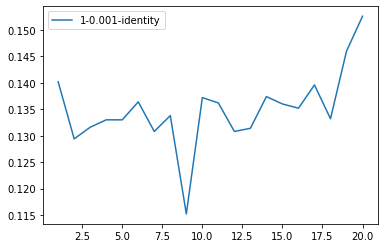

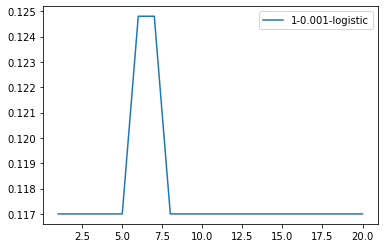

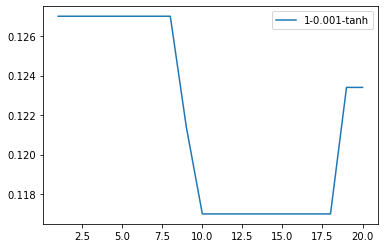

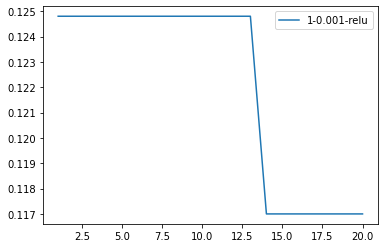

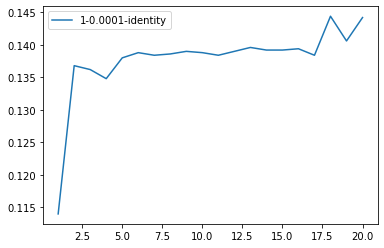

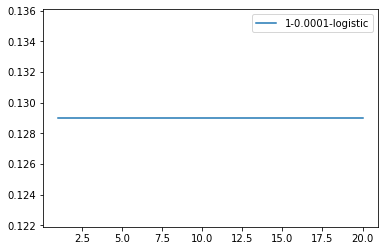

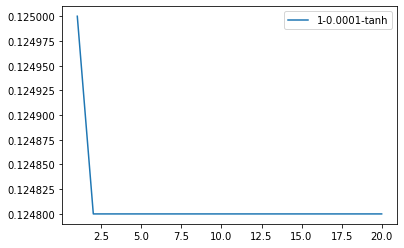

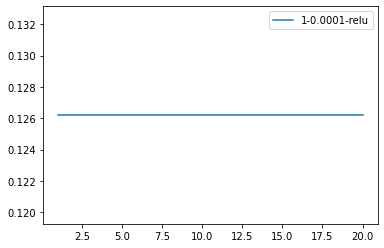

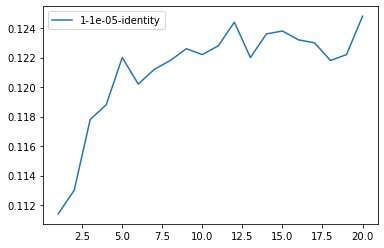

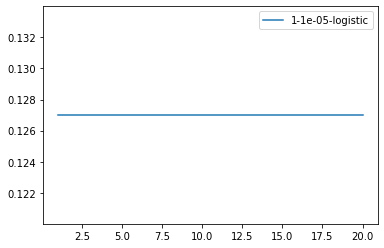

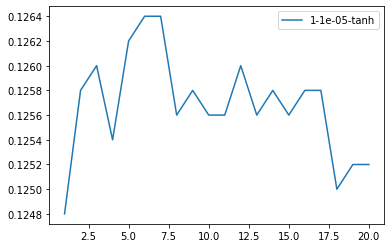

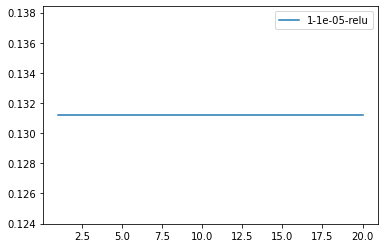

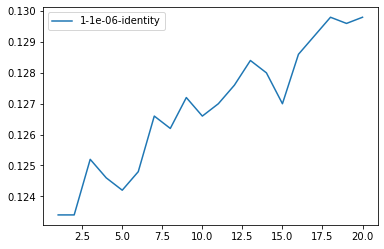

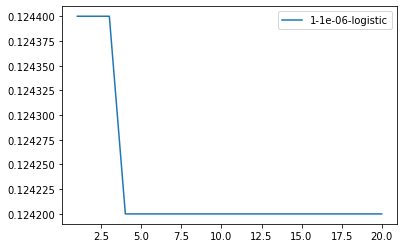

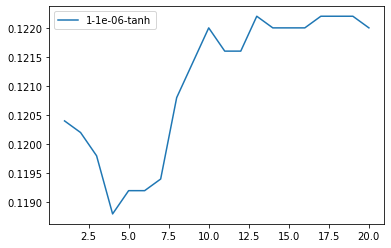

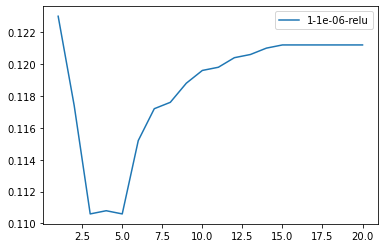

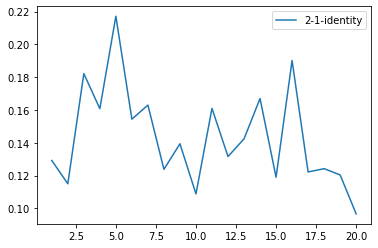

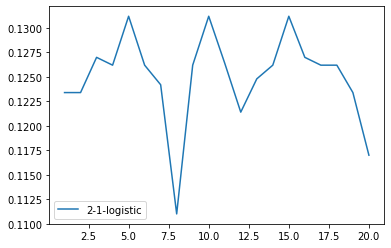

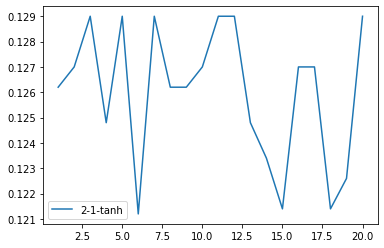

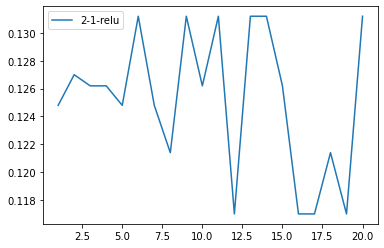

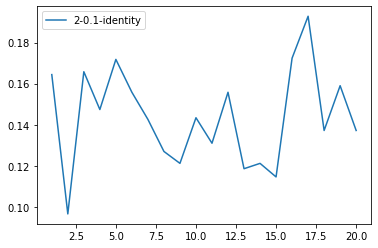

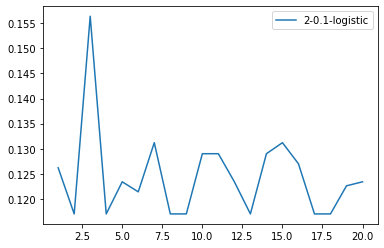

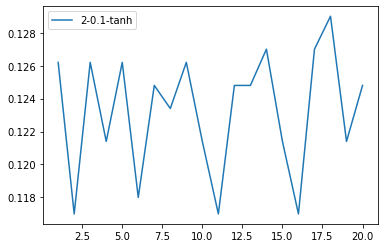

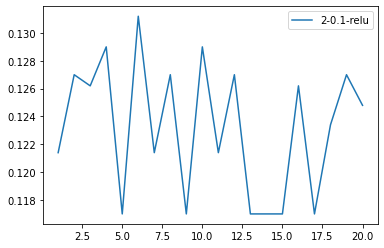

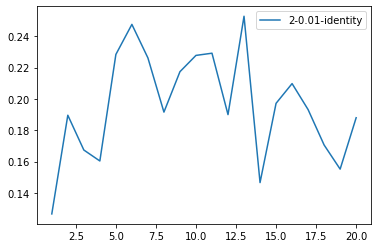

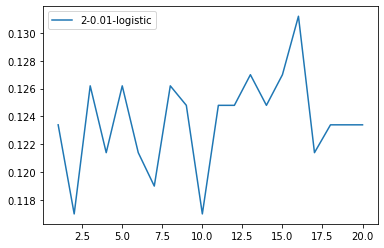

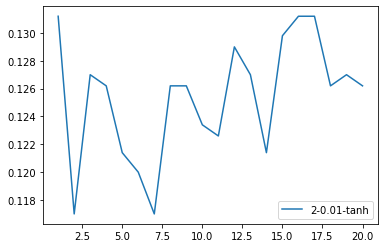

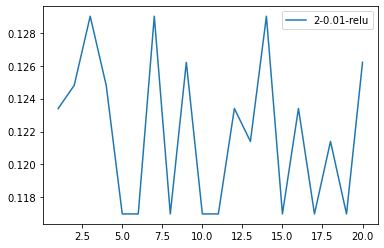

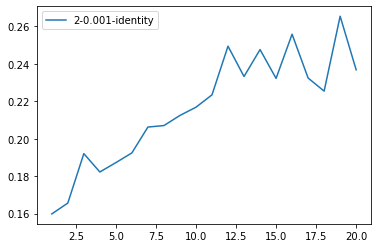

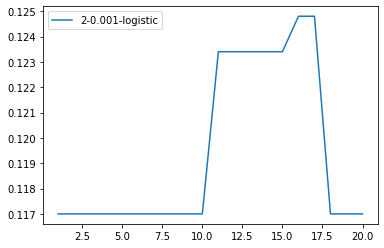

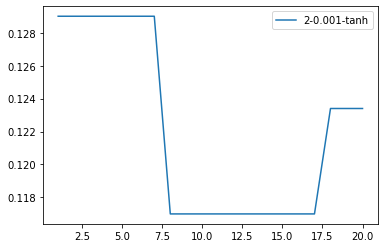

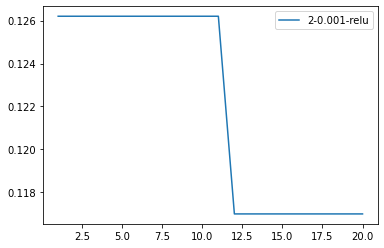

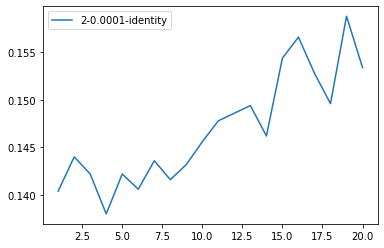

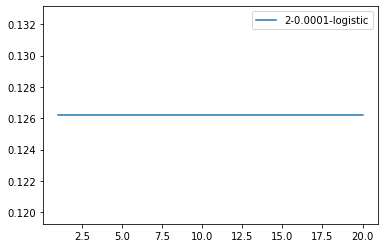

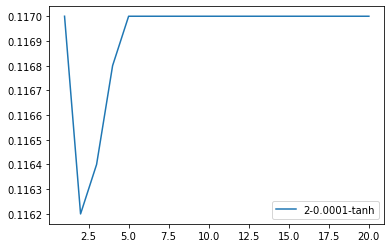

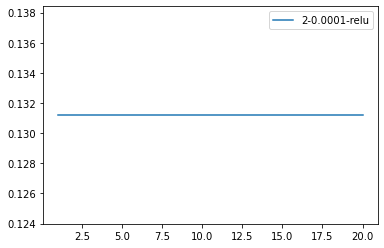

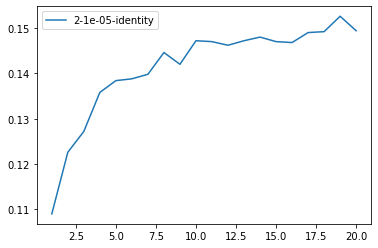

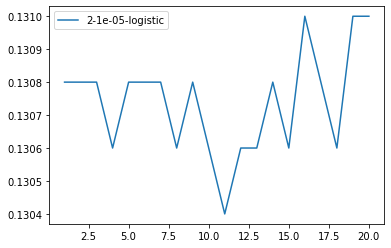

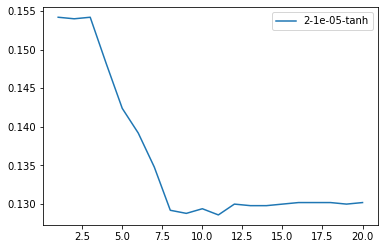

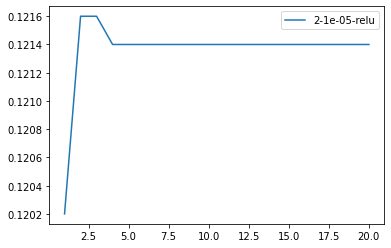

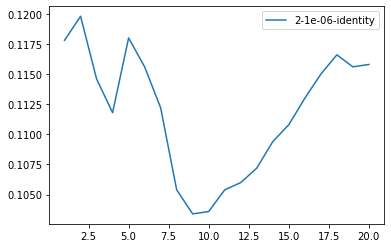

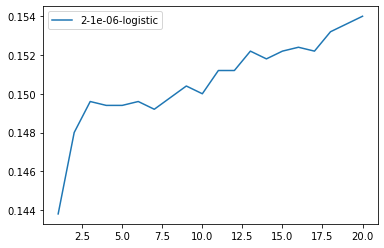

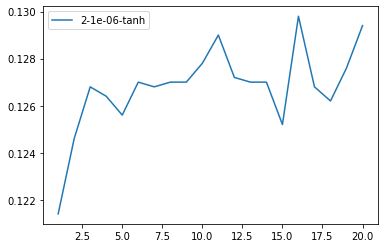

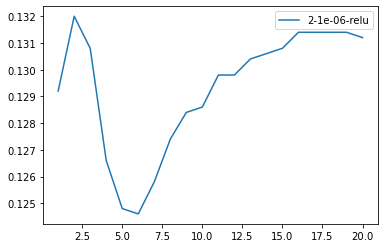

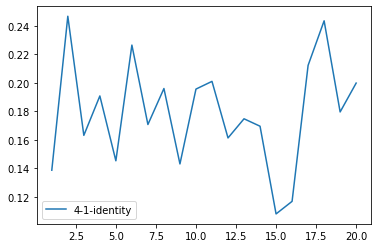

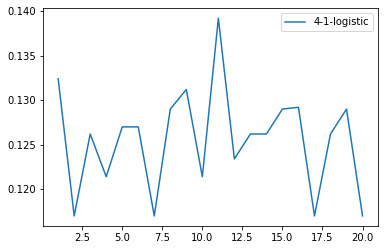

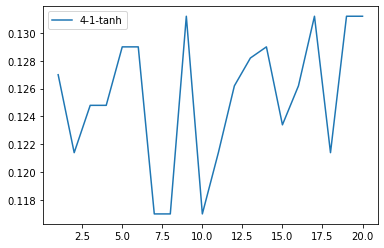

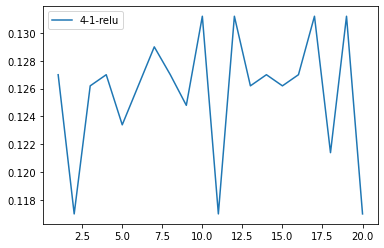

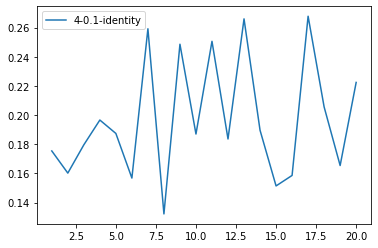

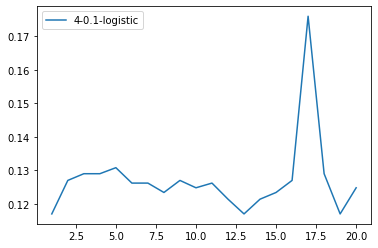

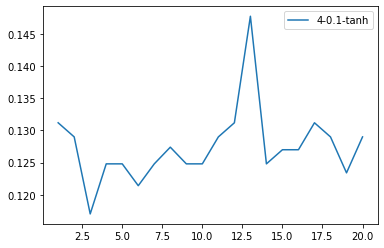

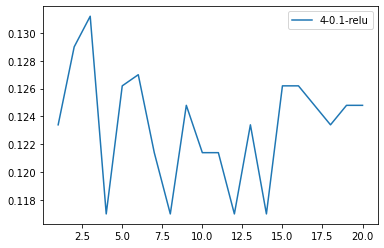

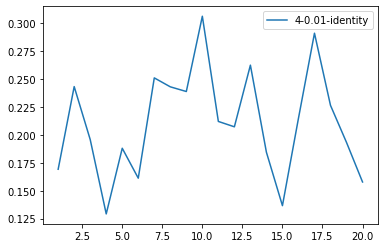

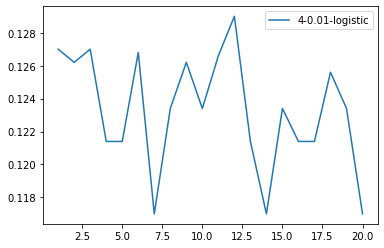

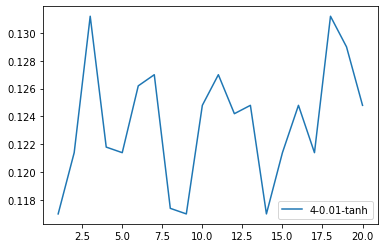

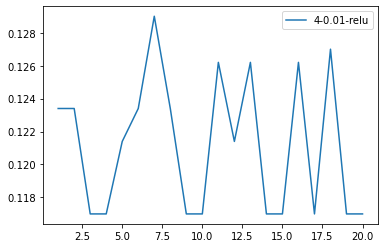

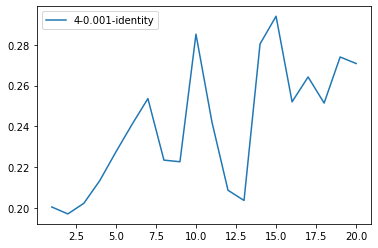

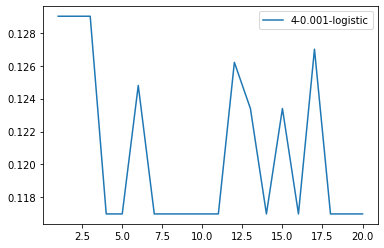

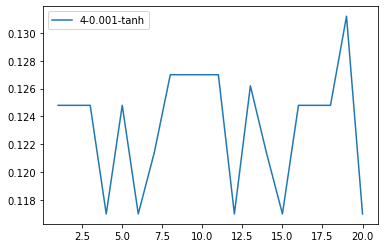

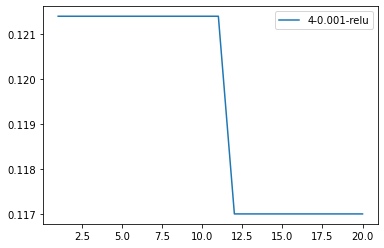

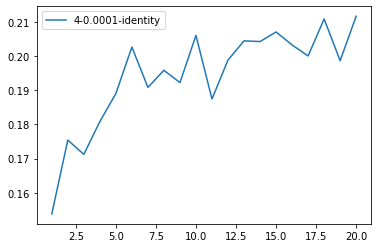

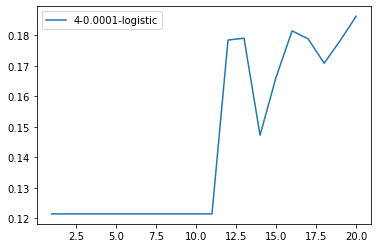

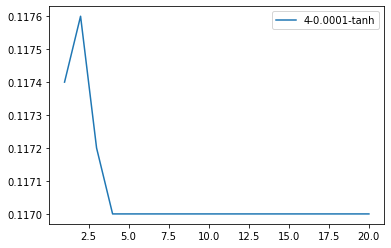

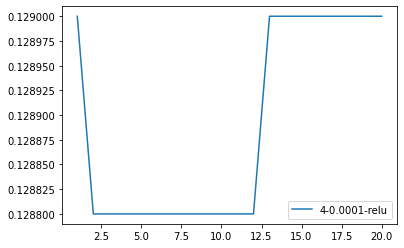

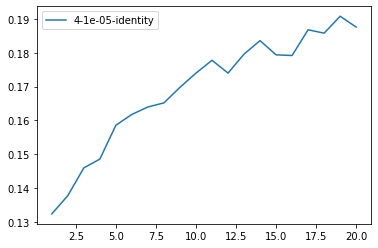

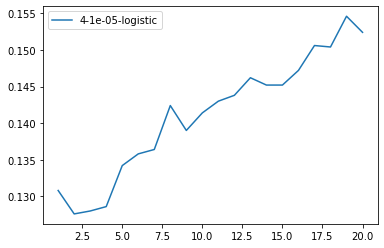

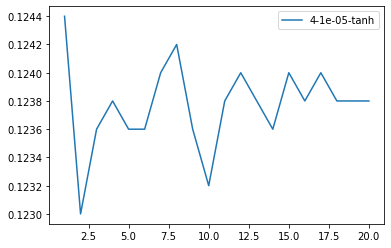

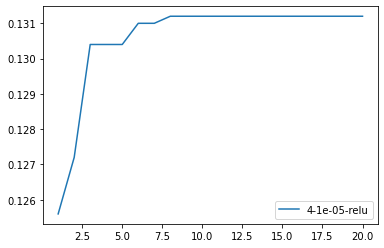

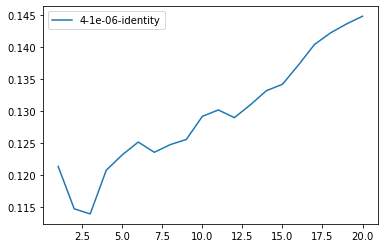

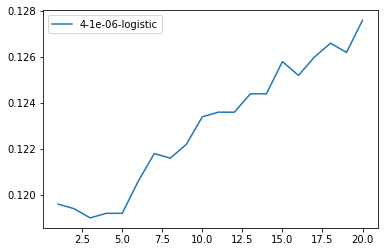

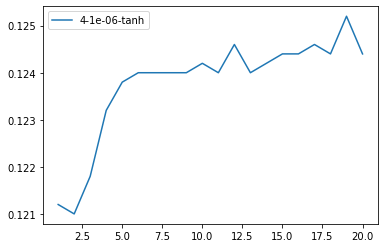

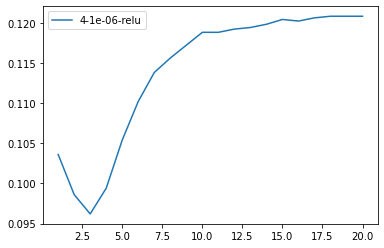

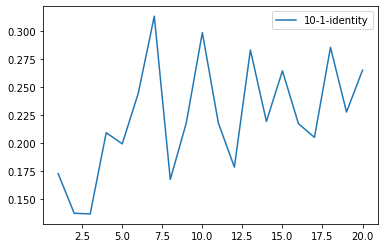

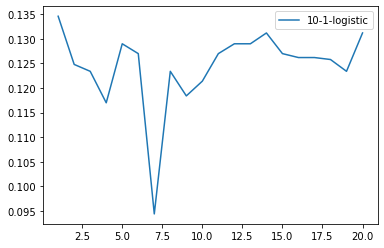

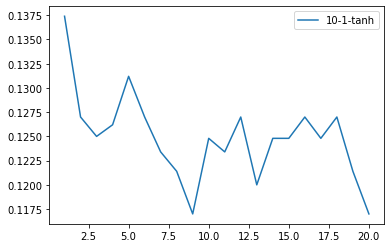

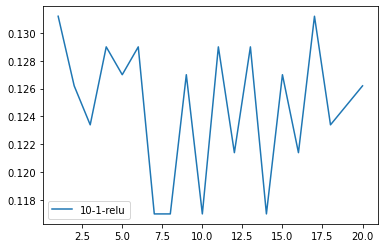

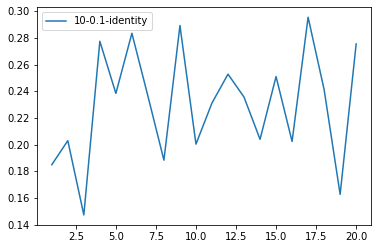

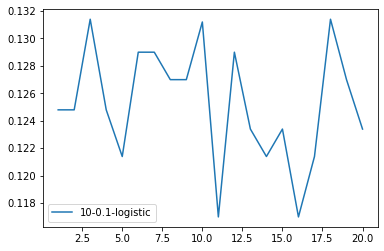

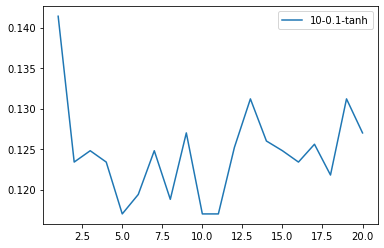

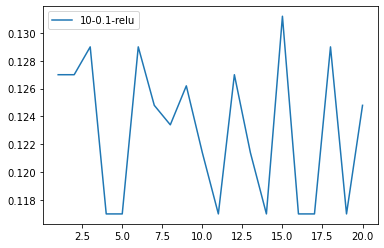

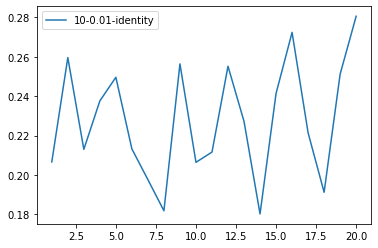

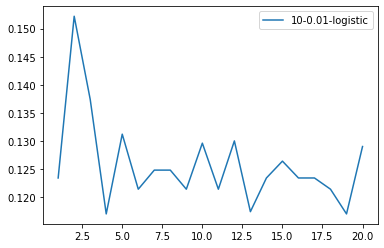

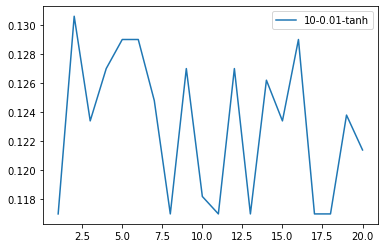

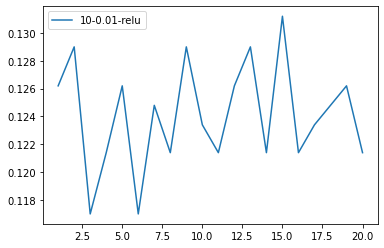

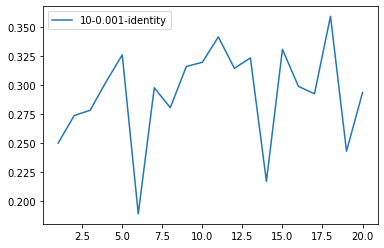

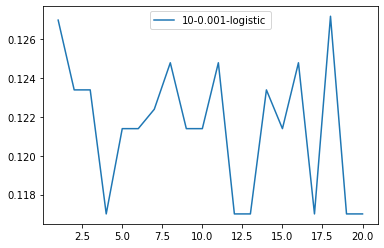

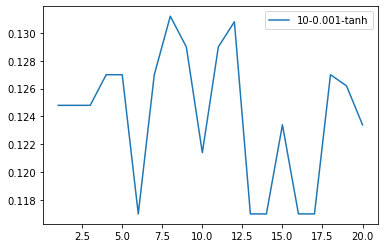

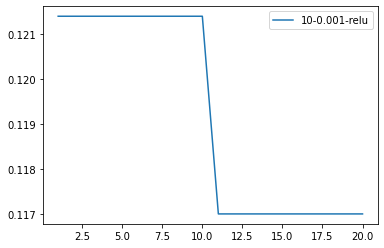

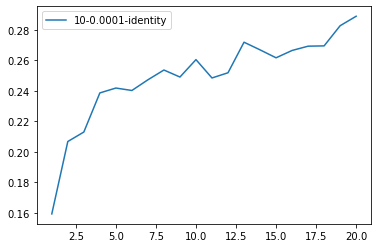

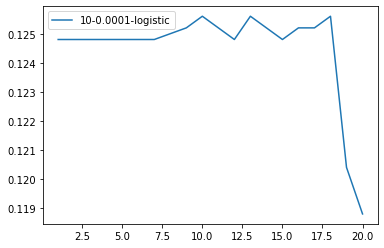

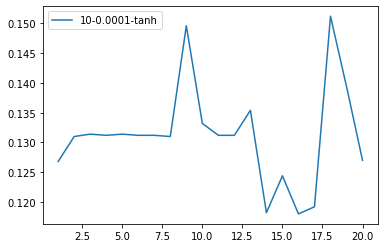

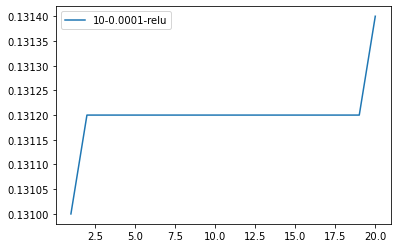

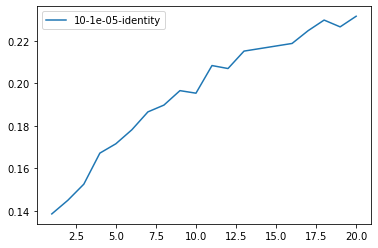

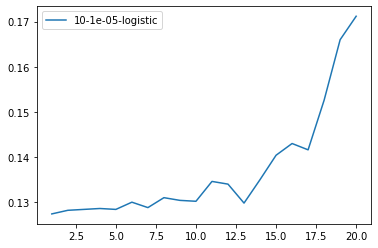

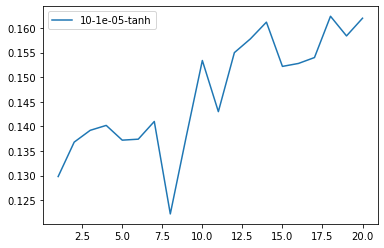

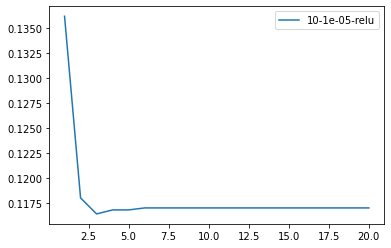

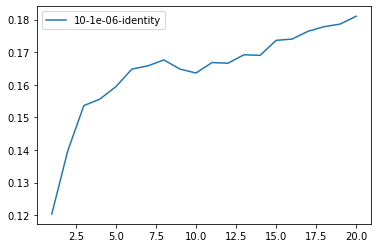

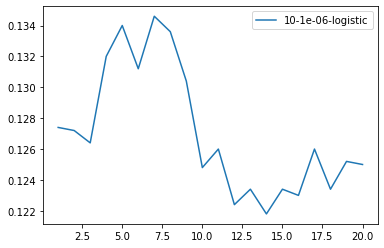

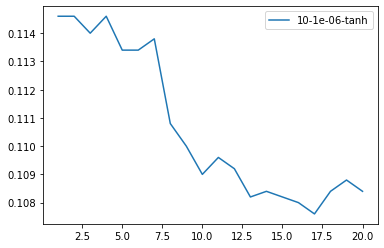

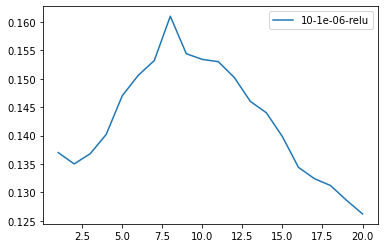

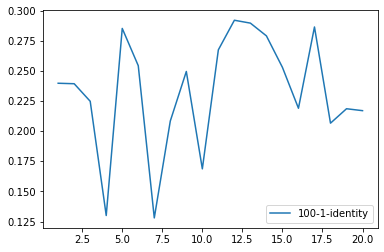

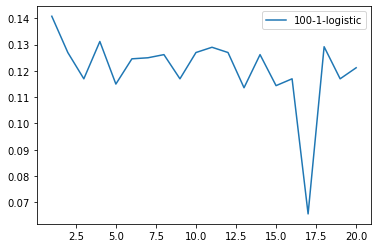

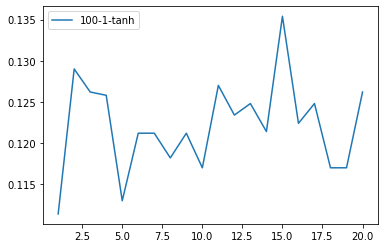

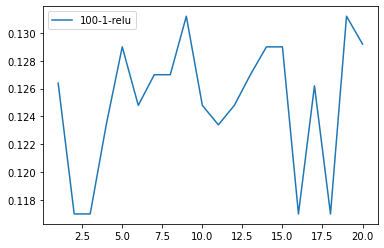

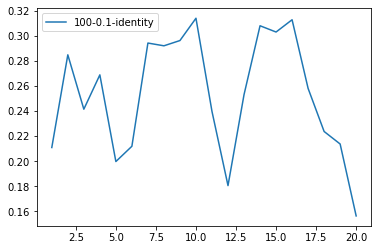

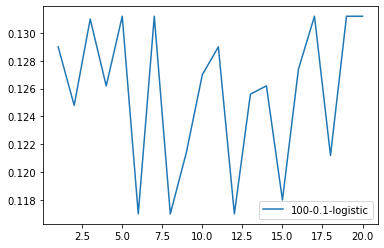

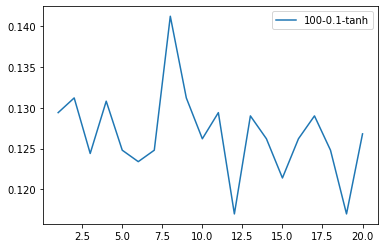

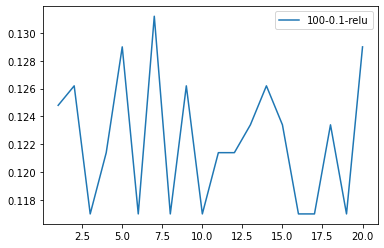

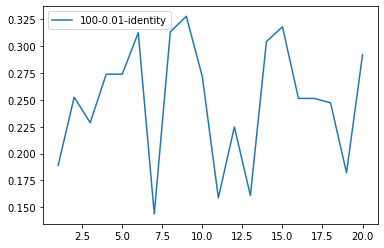

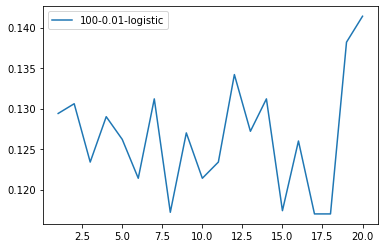

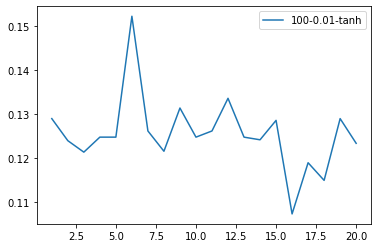

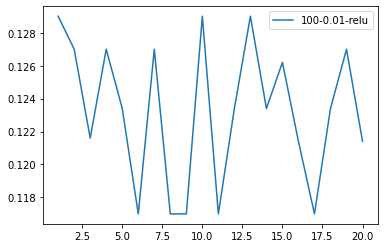

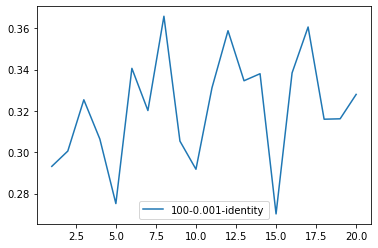

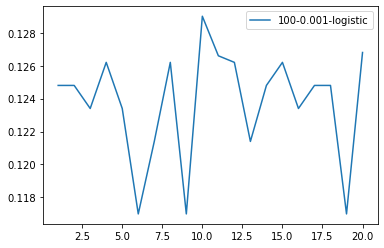

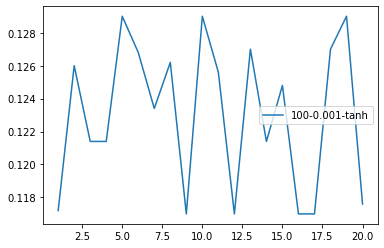

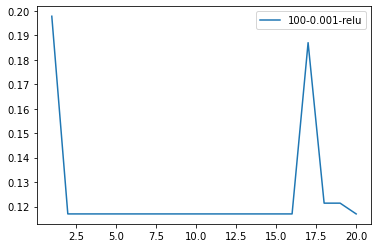

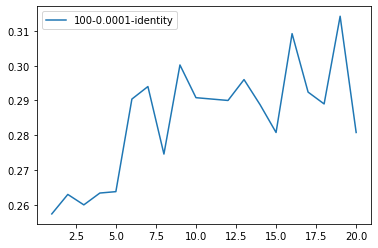

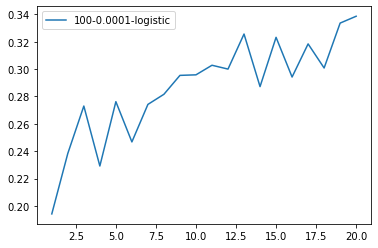

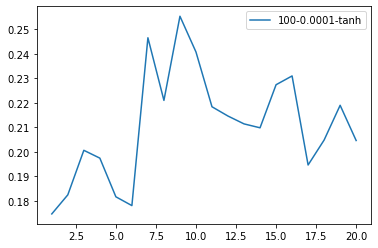

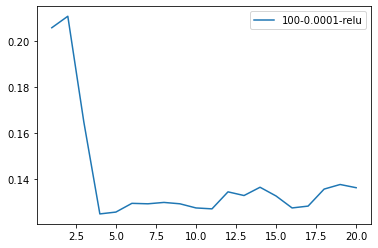

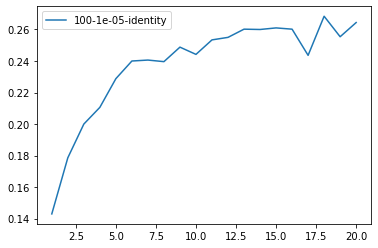

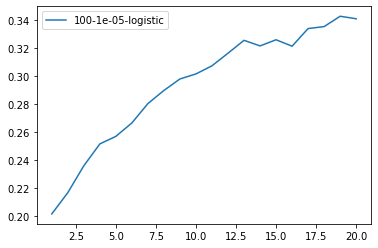

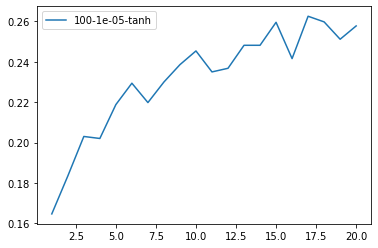

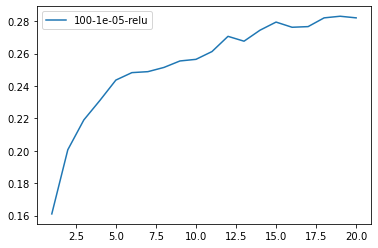

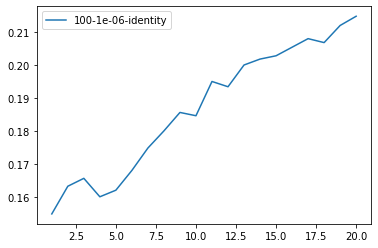

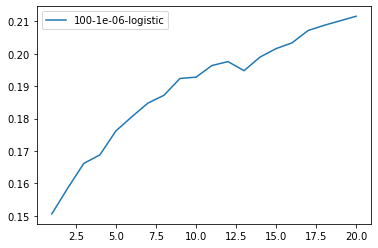

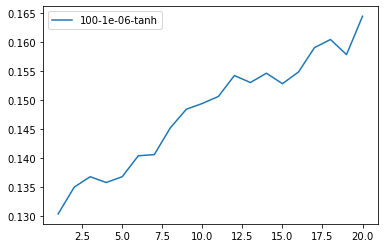

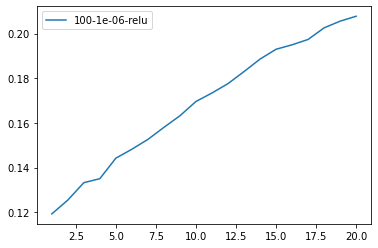

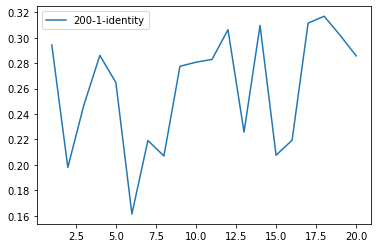

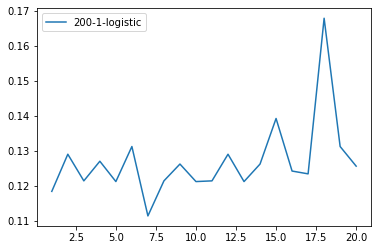

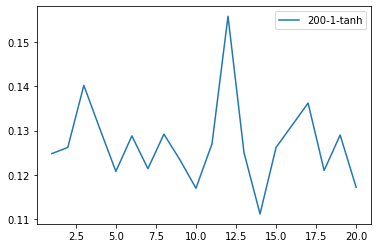

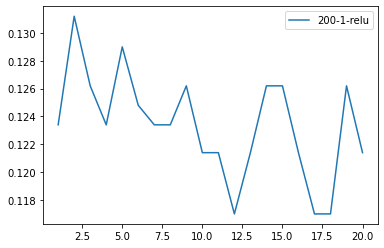

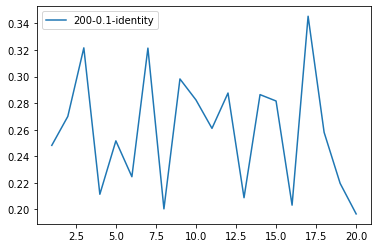

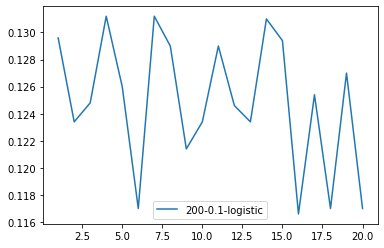

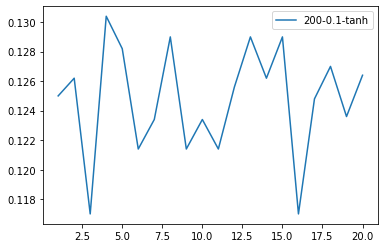

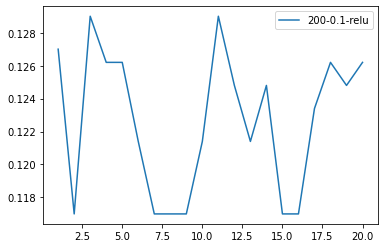

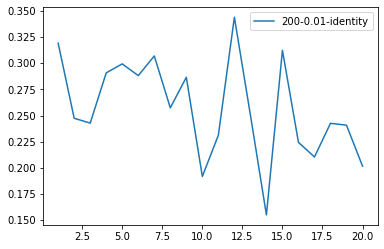

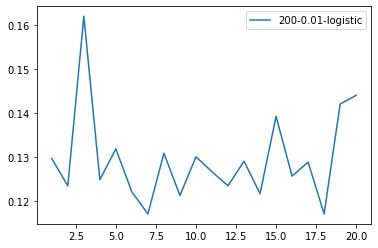

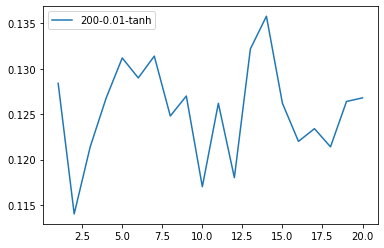

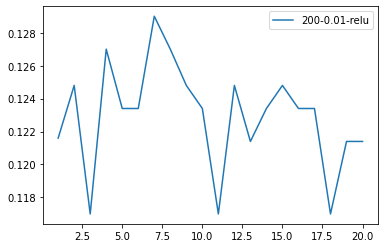

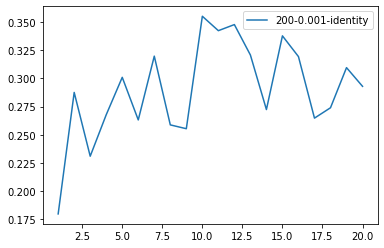

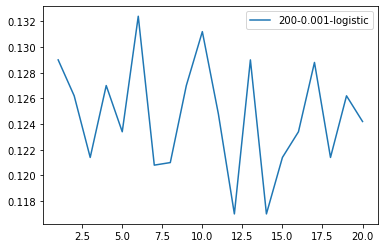

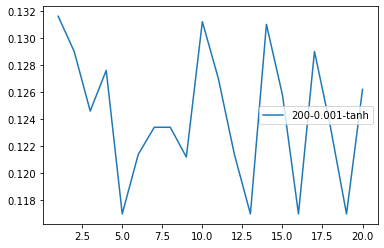

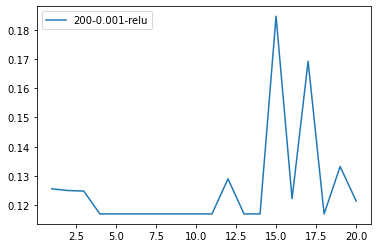

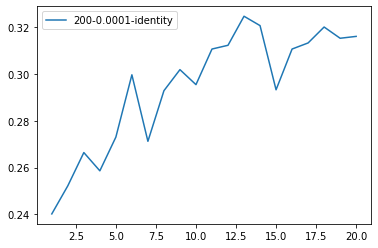

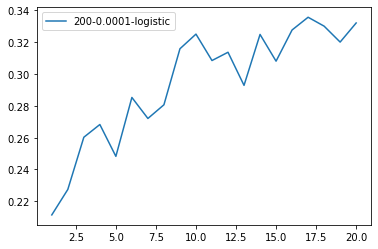

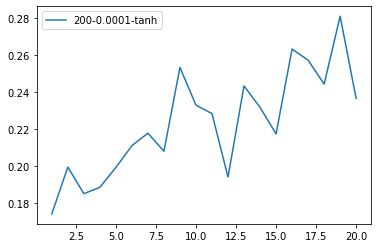

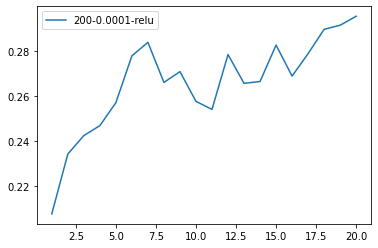

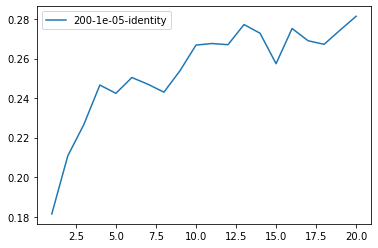

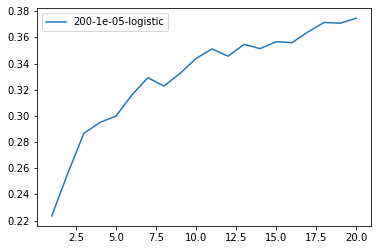

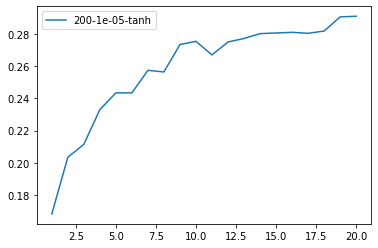

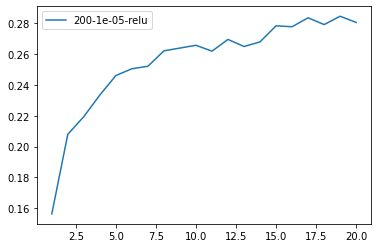

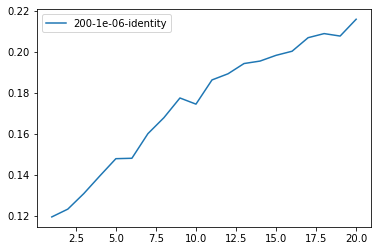

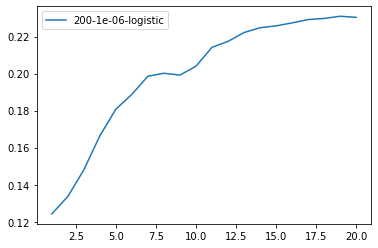

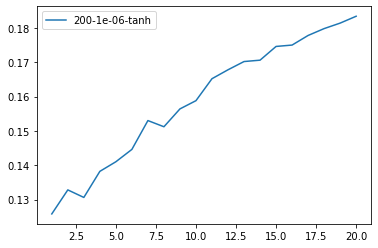

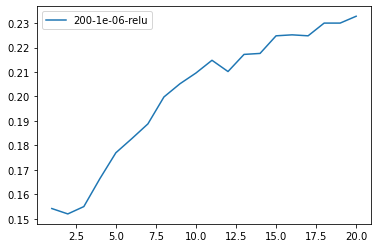

In [22]:
neurons_numbers = []
learning_rates = []
activation_functions = []
curves = []
structures = []
structures_acc = []
#for neurons, learning_rates, functions in zip(n1, lr, af):
for neurons in n1:
  for learning_rates in lr:
    for functions in af:
      nn = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(neurons,),
                                                max_iter = 1 ,
                                                warm_start = True, 
                                                learning_rate_init =learning_rates, 
                                                activation = functions ,
                                                #n_iter_no_change = 20
                                                )
      structures.append((neurons, learning_rates, functions))
      curve = []
      iteration = 0
      for i in range(20):
        iteration += 1
        start = time.time()
        nn.fit(X_analysis, y_analysis)
        stop = time.time()
        tt = stop - start
        accuracy =  sklearn.metrics.accuracy_score(y_valid , nn.predict(X_valid))
        curve.append(accuracy)
        #print("Accuracy:", accuracy, "\n",
        #      "Neurons:",  neurons, "\n",
        #      "Learning Rate:",learning_rates, "\n",
        #      "Activation Function:", functions, "\n\n")
        structures_acc.append((accuracy, tt, iteration,  neurons, learning_rates, functions))
      
      curves.append(curve)
      fig, ax = plt.subplots()
      #for structure, curve in zip(structures, curves):
      ax.plot(range(1, len(curve)+1), curve, label= str(neurons)+"-"+ str(learning_rates) + "-" + functions)
      ax.legend()
      plt.show() 

2.2 
Params Output of MLPC as DataFrame

In [23]:
df = pd.DataFrame(data = structures_acc, columns = ['accuracy','time', 'iteration','neurons', 'learning_rates', 'functions'])

In [24]:
df

accuracy      time  iteration  neurons  learning_rates functions
0       0.1194  1.324724          1        1        1.000000  identity
1       0.1276  1.125780          2        1        1.000000  identity
2       0.1160  1.090764          3        1        1.000000  identity
3       0.1122  1.143752          4        1        1.000000  identity
4       0.1200  1.125806          5        1        1.000000  identity
...        ...       ...        ...      ...             ...       ...
3355    0.2252  2.434339         16      200        0.000001      relu
3356    0.2248  2.475910         17      200        0.000001      relu
3357    0.2300  2.432901         18      200        0.000001      relu
3358    0.2300  2.407195         19      200        0.000001      relu
3359    0.2328  2.604909         20      200        0.000001      relu

[3360 rows x 6 columns]

In [25]:
df.groupby(['neurons',	'learning_rates',	'functions']).agg({'accuracy': ['max'], 'time':"mean"})

accuracy      time
                                      max      mean
neurons learning_rates functions                   
1       0.000001       identity    0.1298  1.190614
                       logistic    0.1244  1.104555
                       relu        0.1230  1.043402
                       tanh        0.1222  1.043431
        0.000010       identity    0.1248  1.082642
...                                   ...       ...
200     0.100000       tanh        0.1304  2.015325
        1.000000       identity    0.3170  2.007021
                       logistic    0.1678  2.036737
                       relu        0.1312  2.008390
                       tanh        0.1558  2.008993

[168 rows x 2 columns]

Heatmap to compare across configurations

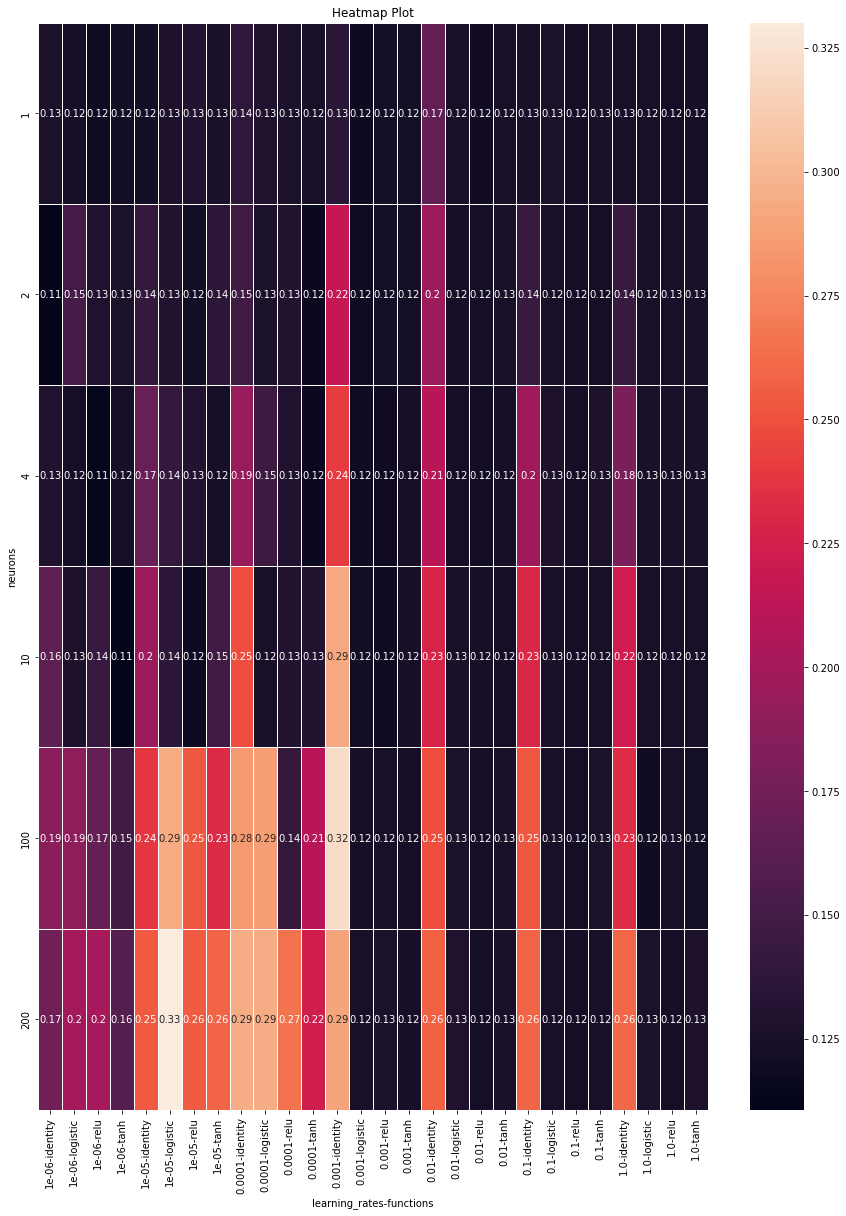

In [26]:
df_matriz = pd.pivot_table(df, values='accuracy', index=['neurons'],  columns=['learning_rates', 'functions'])
plot_heatmap(df_matriz)

Best Configuration of (architecture + learning rate + Functions )

In [27]:
df[df.accuracy  == df.accuracy.max()]

accuracy      time  iteration  neurons  learning_rates functions
3239    0.3746  2.523342         20      200         0.00001  logistic

2. 3

In [53]:
nn = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(200,),
                                                max_iter = 20 ,
                                                warm_start = True, 
                                                learning_rate_init =0.00001, 
                                                activation = "logistic" ,
                                                n_iter_no_change = 20
                                                )
nn.fit(X_analysis, y_analysis)
prediction = nn.predict(X_valid)
accuracy =  sklearn.metrics.accuracy_score(y_valid , nn.predict(X_valid))



In [54]:
print(accuracy)

0.364


Best Accuracy = 0.376

In [55]:
label_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#X=rgb.drop("label",axis=1).values

#y=rgb["label"].values

X = np.array(X_valid).reshape(len(X_valid),3,32,32)
X = X.transpose(0,2,3,1)

In [61]:
prediction.shape

(5000,)

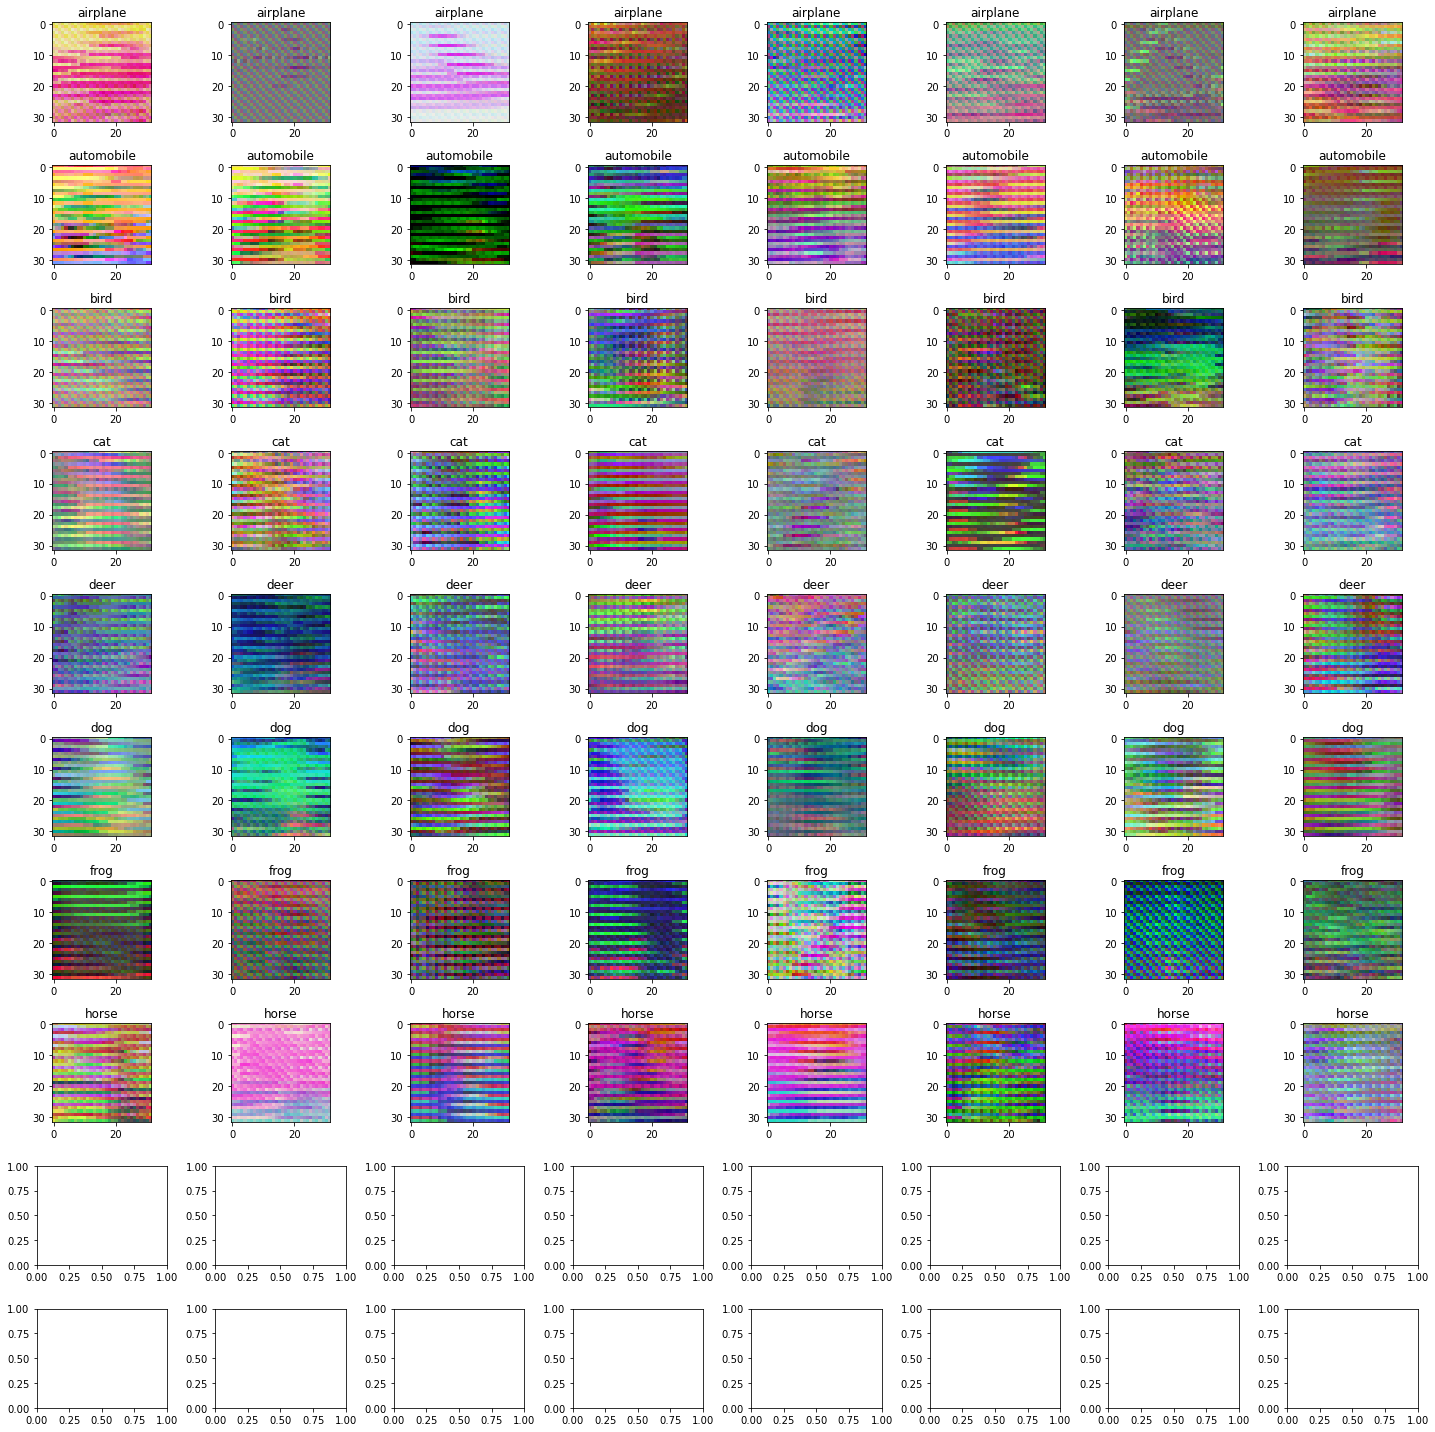

In [64]:
# Visual Analysis

#show_rgb_instances(X_valid, prediction, 20)
show_rgb_instances(X, prediction, 8)